# Import dataset From BiqQuery to DF

In [ ]:
# GCP BigQuery Code to filter down raw dataset to filtered data
'''
%%bigquery results --project empirical-methods-438101
SELECT
  AGE, EDUC, RACE, GENDER, STATEFIP, MARSTAT, EMPLOY, LIVARAG, SAP, MH1, MH2, MH3, IJSSERVICE
FROM
  `empirical-methods-438101.mhcld_puf_2022.mhcld_puf_2022`
WHERE
  AGE BETWEEN 4 AND 14
  AND AGE != -9
  AND EDUC IN (4, 5)
  AND RACE != -9
  AND GENDER IN (1, 2)
  AND STATEFIP != 99
  AND MARSTAT != -9
  AND EMPLOY != -9
  AND LIVARAG = 2
  AND SAP = 2
  AND MH1 != -9
  AND IJSSERVICE = 2;
  '''

In [2]:
# Uncomment to run if using GCP and original dataset
'''
# Drop columns SAP AND LIVARAG AND IJSSERVICE- we needed them previously to filter
results = results.drop(columns=['SAP', 'LIVARAG','IJSSERVICE'])

# Remove substance abuse cases
results_working_set = results[
    ~((results['MH1'] == 12) |
      (results['MH2'] == 12) |
      (results['MH3'] == 12))
]

# Make a copy
filtered_results = results_working_set.copy()

# View Working Dataset
filtered_results.head()

# Get Shape of Working Dataset
print(filtered_results.shape)
print(type(filtered_results))

# Save data to pickle for future use outside of BQ
file_name = "2022_mhcld_filtered.pkl"
if os.path.exists(file_name):
    os.remove(file_name)
filtered_results.to_pickle(file_name)

# Save data to a csv
csv_file_name = "2022_mhcld_processed.csv"
if os.path.exists(csv_file_name):
    os.remove(csv_file_name)
filtered_results.to_csv(csv_file_name, index=True)
print(f"Saved {csv_file_name}")
'''

'\n# Drop columns SAP AND LIVARAG AND IJSSERVICE- we needed them previously to filter\nresults = results.drop(columns=[\'SAP\', \'LIVARAG\',\'IJSSERVICE\'])\n\n# Remove substance abuse cases\nresults_working_set = results[\n    ~((results[\'MH1\'] == 12) |\n      (results[\'MH2\'] == 12) |\n      (results[\'MH3\'] == 12))\n]\n\n# Make a copy\nfiltered_results = results_working_set.copy()\n\n# View Working Dataset\nfiltered_results.head()\n\n# Get Shape of Working Dataset\nprint(filtered_results.shape)\nprint(type(filtered_results))\n\n# Save data to pickle for future use outside of BQ\nfile_name = "2022_mhcld_filtered.pkl"\nif os.path.exists(file_name):\n    os.remove(file_name)\nfiltered_results.to_pickle(file_name)\n\n# Save data to a csv \ncsv_file_name = "2022_mhcld_processed.csv"\nif os.path.exists(csv_file_name):\n    os.remove(csv_file_name)\nfiltered_results.to_csv(csv_file_name, index=True)\nprint(f"Saved {csv_file_name}")\n'

# Import Libraries

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import os
import pickle

# Load Processed Dataset from Git Repo

In [5]:
# Load dataset from GitHub
# Repo: https://github.com/dyh2111/eds-mhcld

# csv path
csv_file_name = "https://raw.githubusercontent.com/dyh2111/eds-mhcld/2e000f8572ee58b49e87e3f0b7a71ae0f6814903/dataset/2022_mhcld_processed.csv"

# Read the CSV file
filtered_results = pd.read_csv(csv_file_name)

print("Expected Shape: (370515, 10)")
print("Actual Shape:", filtered_results.shape)

Expected Shape: (370515, 10)
Actual Shape: (370515, 11)


'\nfile_name = "2022_mhcld_filtered.pkl"\nfiltered_results = pd.read_pickle(file_name)\n\nfiltered_results.head()\n'

In [7]:
# Check how data looks
print(filtered_results.head())

   Unnamed: 0  AGE  EDUC  RACE  GENDER  STATEFIP  MARSTAT  EMPLOY  MH1  MH2  \
0           0   12     4     5       2        38        2       5    2    1   
1           1    9     5     5       2         1        1       5    2    1   
2           2    5     4     6       2         1        1       1    2    1   
3           3    9     5     5       1         1        4       4    2    1   
4           4    6     5     5       2         8        1       4    2    1   

   MH3  
0    6  
1    7  
2   -9  
3   -9  
4    7  


# Summary Statistics

In [ ]:
# Lets understand how many cases have 1,2, or 3 diagnosis

# Create label mapping
diagnosis_mapping = {
    1: "Trauma and stressor",
    2: "Anxiety",
    3: "ADHD",
    4: "Conduct",
    5: "Delirium/dementia",
    6: "Bipolar",
    7: "Depressive",
    8: "Oppositional defiant",
    9: "Pervasive developmental",
    10: "Personality",
    11: "Schizophrenia/psychotic",
    12: "Alcohol/substance use",
    13: "Other disorders",
    -9: "None/Unknown"
}


# Check Distribution of Targets as percentages
distribution_of_diagnosis_df = pd.DataFrame({
    'Main Diagnosis': filtered_results.MH1.map(diagnosis_mapping).value_counts(normalize=True)*100,
    'Secondary Diagnosis': filtered_results.MH2.map(diagnosis_mapping).value_counts(normalize=True)*100,
    'Third Diagnosis': filtered_results.MH3.map(diagnosis_mapping).value_counts(normalize=True)*100
})

# Display distributions side by side as percentages
print(distribution_of_diagnosis_df)

                         Main Diagnosis  Secondary Diagnosis  Third Diagnosis
ADHD                           1.786163             2.291675         1.375113
Anxiety                       13.014048            19.543878         3.105137
Bipolar                       18.257560             1.405611         0.366517
Conduct                        0.122532             0.090685         0.055868
Delirium/dementia              0.095813             0.151951         0.045072
Depressive                    33.696342             5.731212         0.933835
None/Unknown                        NaN            55.565362        87.113882
Oppositional defiant           0.041294             0.059377         0.047771
Other disorders                4.962282             3.541827         1.753775
Personality                    0.798348             1.843380         1.458510
Pervasive developmental        0.727906             0.715221         0.374884
Schizophrenia/psychotic       15.156741             0.777027    

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

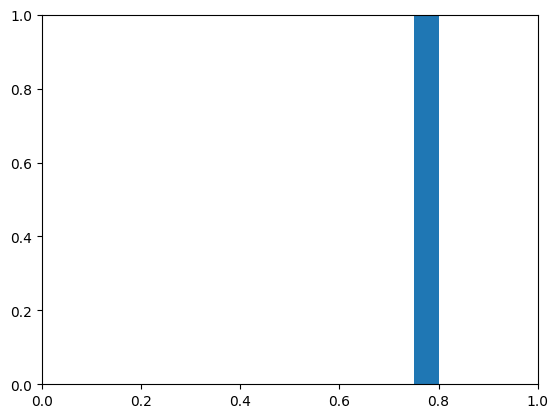

In [ ]:
# Plot Age Distribution

age_mapping = {
    4: "18–20 years",
    5: "21–24 years",
    6: "25–29 years",
    7: "30–34 years",
    8: "35–39 years",
    9: "40–44 years",
    10: "45–49 years",
    11: "50–54 years",
    12: "55–59 years",
    13: "60–64 years",
    14: "65+ years"
}

# Relabel int encoding to values
results['AGE_GROUP'] = filtered_results['AGE'].map(age_mapping)


# Plot histogram
plt.figure(figsize=(10, 6))
results.plot(kind='bar')
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()


In [ ]:


# State mapping
state_mapping = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota",
    28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska",
    32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 35: "New Mexico",
    36: "New York", 37: "North Carolina", 38: "North Dakota", 39: "Ohio",
    40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island",
    45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas",
    49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington",
    54: "West Virginia", 55: "Wisconsin", 56: "Wyoming", 72: "Puerto Rico"
}

results['STATE_NAME'] = results['STATEFIP'].map(state_mapping)

# Download the shapefile ZIP
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_1_states_provinces.zip"
zip_path = "ne_110m_admin_1_states_provinces.zip"
extract_path = "ne_110m_admin_1_states_provinces"

if not os.path.exists(extract_path):
    # Download the file
    print("Downloading shapefile...")
    response = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(response.content)

    # Extract the ZIP file
    print("Extracting shapefile...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)

# Load the shapefile using GeoPandas
shapefile_path = os.path.join(extract_path, "ne_110m_admin_1_states_provinces.shp")
gdf = gpd.read_file(shapefile_path)

# Filter for US states only
us_states = gdf[gdf['admin'] == 'United States']

# Merge geospatial data with results
us_states['STATE_NAME'] = us_states['name']
merged = us_states.merge(results, how='left', left_on='STATE_NAME', right_on='STATE_NAME')

# Plot heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='VALUE', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add titles and labels
plt.title("Heatmap of Generic Values Across US States", fontsize=16)
plt.axis('off')
plt.show()


Extracting shapefile...


BadZipFile: File is not a zip file

In [ ]:
import pandas as pd
import plotly.express as px

# Example dataset


# Aggregate data (count occurrences by state)
state_counts = results.groupby('STATE_NAME').size().reset_index(name='value')

# Map state names to abbreviations if necessary (optional)
state_mapping = {
    "Alabama": "AL", "Colorado": "CO", "Indiana": "IN", "New York": "NY"
}
state_counts['state'] = state_counts['STATE_NAME'].map(state_mapping)

# Print the aggregated DataFrame
print(state_counts)


              STATE_NAME  value state
0                Alabama  21944    AL
1                 Alaska   1116   NaN
2               Colorado  68941    CO
3            Connecticut   3578   NaN
4               Delaware      7   NaN
5   District of Columbia     54   NaN
6                Florida      5   NaN
7                Georgia      1   NaN
8                 Hawaii    171   NaN
9                  Idaho      3   NaN
10              Illinois   6377   NaN
11               Indiana  32000    IN
12              Kentucky  40889   NaN
13             Louisiana    351   NaN
14              Maryland  25764   NaN
15              Michigan  11243   NaN
16           Mississippi      2   NaN
17              Missouri   2726   NaN
18               Montana      2   NaN
19                Nevada     21   NaN
20         New Hampshire    912   NaN
21            New Jersey    936   NaN
22              New York   4279    NY
23        North Carolina      9   NaN
24          North Dakota   1354   NaN
25          

In [ ]:
import pandas as pd
import plotly.express as px

# State mapping
state_mapping = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota",
    28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska",
    32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 35: "New Mexico",
    36: "New York", 37: "North Carolina", 38: "North Dakota", 39: "Ohio",
    40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island",
    45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas",
    49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington",
    54: "West Virginia", 55: "Wisconsin", 56: "Wyoming", 72: "Puerto Rico"
}

# Add state names to the DataFrame
results['state'] = results['STATEFIP'].map(state_mapping)

# Plot choropleth map
fig = px.choropleth(
    results,
    locations="state",           # Column with state names
    locationmode="USA-states",   # Specifies US state names
    color="value",               # Column to determine color intensity
    scope="usa",                 # Focus on the USA
    title="United States Map",   # Title of the map
    color_continuous_scale="Purples"  # Color scheme
)

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['AGE', 'EDUC', 'RACE', 'GENDER', 'STATEFIP', 'MARSTAT', 'EMPLOY', 'LIVARAG', 'SAP', 'MH1', 'MH2', 'MH3', 'MH1_LABEL', 'STATE_NAME', 'state'] but received: value

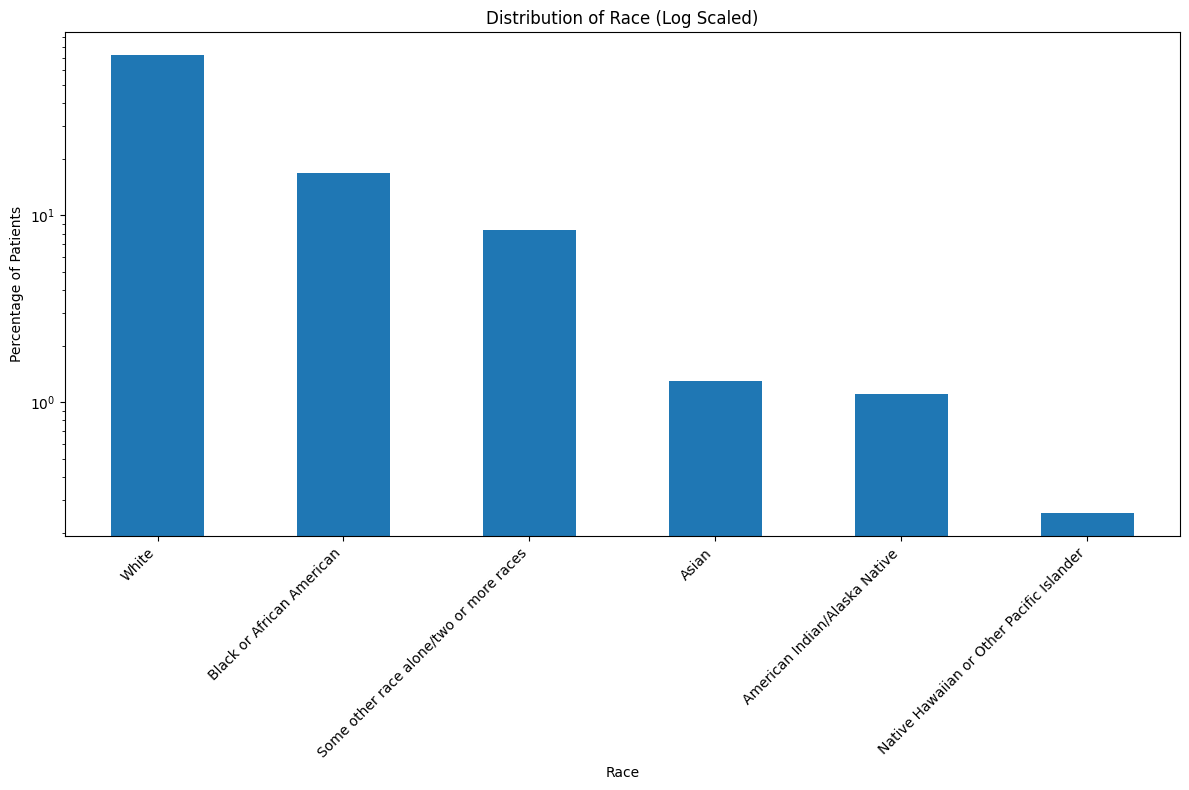

In [ ]:
# Race Distribution

race_mapping = {
    2: "American Indian and Alaska Native",
    3: "Asian or Pacific Islander",
    13: "Asian",
    23: "Native Hawaiian or Other Pacific Islander",
    4: "Black or African American",
    5: "White",
    20: "Some other race alone",
    21: "Two or more races",
    22: "Hispanic",
    1: "American Indian/Alaska Native",
    2: "Asian",
    3: "Black or African American",
    4: "Native Hawaiian or Other Pacific Islander",
    5: "White",
    6: "Some other race alone/two or more races"
}

# Map race
results['RACE_GROUP'] = results['RACE'].map(race_mapping)

# Generate the race distribution as a percentage
race_summary = results['RACE_GROUP'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(12, 8))
race_summary.plot(kind='bar', log=True)
plt.title("Distribution of Race (Log Scaled)")
plt.xlabel("Race")
plt.ylabel("Percentage of Patients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-147-b39337d63565>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


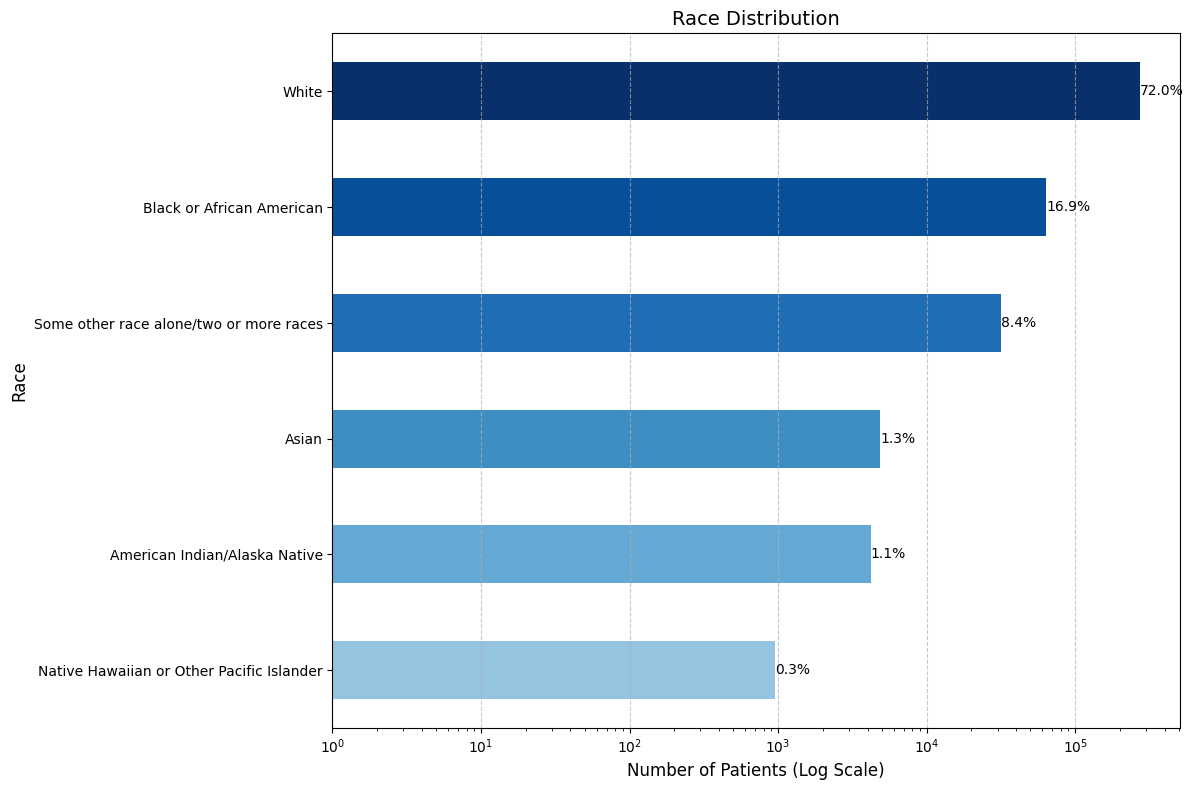

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Race mapping
race_mapping = {
    2: "American Indian and Alaska Native",
    3: "Asian or Pacific Islander",
    13: "Asian",
    23: "Native Hawaiian or Other Pacific Islander",
    4: "Black or African American",
    5: "White",
    20: "Some other race alone",
    21: "Two or more races",
    22: "Hispanic",
    1: "American Indian/Alaska Native",
    2: "Asian",
    3: "Black or African American",
    4: "Native Hawaiian or Other Pacific Islander",
    5: "White",
    6: "Some other race alone/two or more races"
}

# Map RACE codes to labels
results['RACE_GROUP'] = results['RACE'].map(race_mapping)

# Get the counts of each race and sort by value
race_summary = results['RACE_GROUP'].value_counts()

# Calculate percentages
total = race_summary.sum()
percentages = (race_summary / total) * 100

# Create color map based on counts
cmap = cm.get_cmap('Blues')
colors = cmap(np.linspace(0.4, 1, len(race_summary)))  # Use the darker range of Blues

# Plot the horizontal bar chart (sorted by values)
plt.figure(figsize=(12, 8))
bars = race_summary.sort_values().plot(kind='barh', color=colors, log=True)

# Add percentage labels at the end of each bar
for index, value in enumerate(race_summary.sort_values()):
    plt.text(value, index, f"{percentages.sort_values().iloc[index]:.1f}%",
             va='center', ha='left', fontsize=10)

# Titles and labels
plt.title("Race Distribution", fontsize=14)
plt.xlabel("Number of Patients (Log Scale)", fontsize=12)
plt.ylabel("Race", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid for better readability
plt.tight_layout()
plt.show()


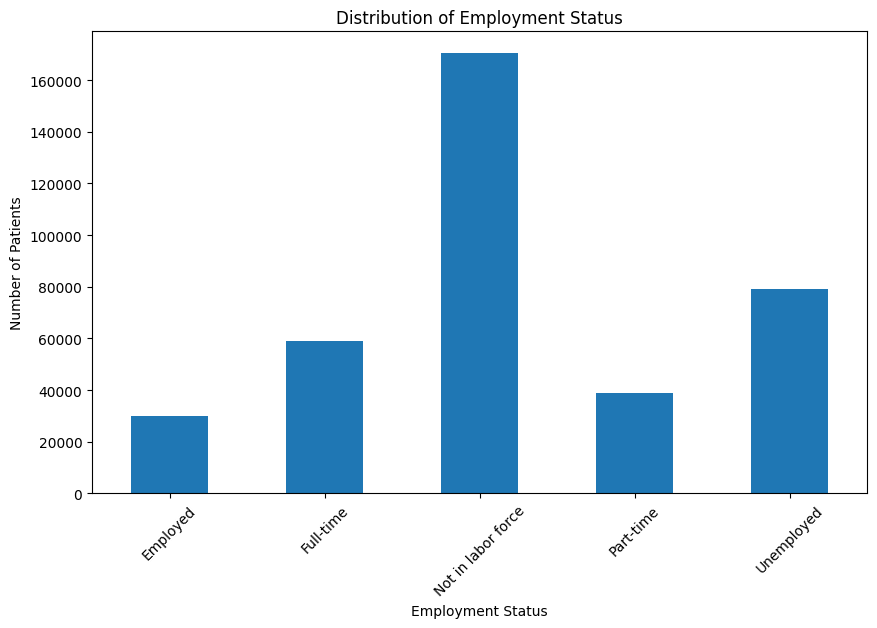

In [ ]:
# Employment Distribution

# Define map
employment_mapping = {
    1: "Full-time",
    2: "Part-time",
    3: "Employed",
    4: "Unemployed",
    5: "Not in labor force"
}

# Apply map
results['EMPLOYMENT_STATUS'] = results['EMPLOY'].map(employment_mapping)

# Get counts
employment_summary = results['EMPLOYMENT_STATUS'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(10, 6))
employment_summary.plot(kind='bar')
plt.title("Distribution of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

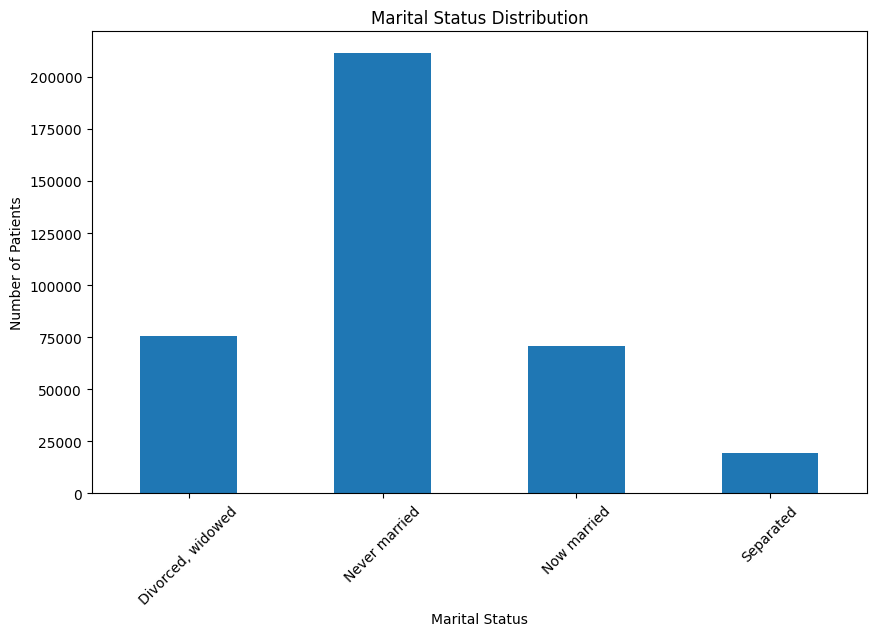

In [ ]:
# Marriage Status

# Define map
marital_status_mapping = {
    1: "Never married",
    2: "Now married",
    3: "Separated",
    4: "Divorced, widowed"
}

# Map encode to map
results['MARITAL_STATUS_LABEL'] = results['MARSTAT'].map(marital_status_mapping)

# Get counts
marital_status_summary = results['MARITAL_STATUS_LABEL'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
marital_status_summary.plot(kind='bar')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

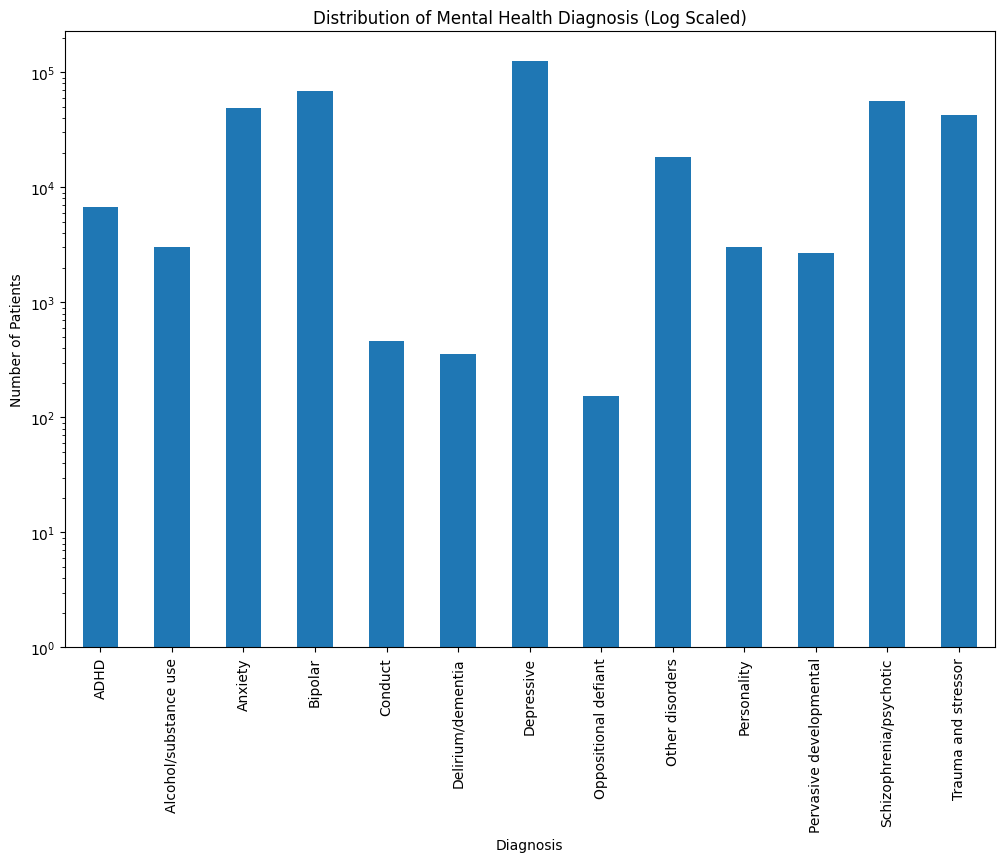

In [ ]:
# Mental Disorder Distribution

mh1_mapping = {
    1: "Trauma and stressor",
    2: "Anxiety",
    3: "ADHD",
    4: "Conduct",
    5: "Delirium/dementia",
    6: "Bipolar",
    7: "Depressive",
    8: "Oppositional defiant",
    9: "Pervasive developmental",
    10: "Personality",
    11: "Schizophrenia/psychotic",
    12: "Alcohol/substance use",
    13: "Other disorders",
    -9: "None/Unknown"
}

# Map to encoding
results['MH1_LABEL'] = results['MH1'].map(mh1_mapping)

# Get counts
mh1_summary = results['MH1_LABEL'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 8))
mh1_summary.plot(kind='bar',log=True)
plt.title("Distribution of Mental Health Diagnosis (Log Scaled)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.xticks(rotation=90)
plt.show()


<ipython-input-52-f5f4be43ecbc>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


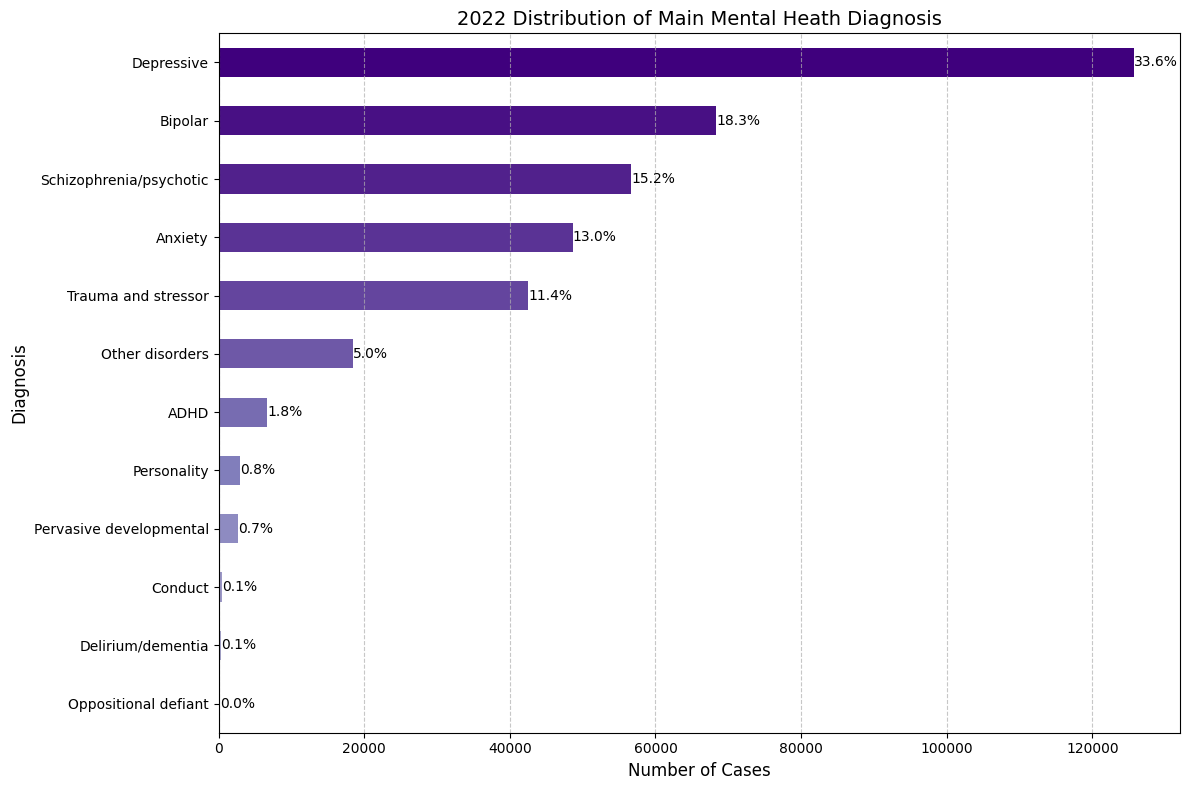

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Mental disorder mapping
mh1_mapping = {
    1: "Trauma and stressor",
    2: "Anxiety",
    3: "ADHD",
    4: "Conduct",
    5: "Delirium/dementia",
    6: "Bipolar",
    7: "Depressive",
    8: "Oppositional defiant",
    9: "Pervasive developmental",
    10: "Personality",
    11: "Schizophrenia/psychotic",
    13: "Other disorders",
}


# Map MH1 codes to labels
results['MH1_LABEL'] = results['MH1'].map(mh1_mapping)

# Get the counts of each diagnosis and sort by value
mh1_summary = results['MH1_LABEL'].value_counts()

# Calculate percentages
total = mh1_summary.sum()
percentages = (mh1_summary / total) * 100

# Create color map based on counts
cmap = cm.get_cmap('Purples')
colors = cmap(np.linspace(0.4, 1, len(mh1_summary)))  # Use the darker range of Purples

# Plot the horizontal bar chart (sorted by values)
plt.figure(figsize=(12, 8))
bars = mh1_summary.sort_values().plot(kind='barh', color=colors, log=False)

# Add percentage labels at the end of each bar
for index, value in enumerate(mh1_summary.sort_values()):
    plt.text(value, index, f"{percentages.sort_values().iloc[index]:.1f}%",
             va='center', ha='left', fontsize=10)

# Titles and labels
plt.title("2022 Distribution of Main Mental Heath Diagnosis", fontsize=14)
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Divide dataset into features and targets

In [8]:
# Import libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Check the size of our working dataset
filtered_results.shape

(370515, 11)

In [ ]:
# Retrieve column names
filtered_results.columns

Index(['AGE', 'EDUC', 'RACE', 'GENDER', 'STATEFIP', 'MARSTAT', 'EMPLOY', 'MH1',
       'MH2', 'MH3'],
      dtype='object')

In [10]:
# Assign Features and Targets
features = filtered_results[['AGE', 'EDUC', 'RACE', 'GENDER', 'STATEFIP', 'MARSTAT', 'EMPLOY']]
targets_condition1 = filtered_results["MH1"]
targets_condition2 = filtered_results["MH2"]
targets_condition3 = filtered_results["MH3"]

# Model Exploration - process a smaller exploratory dataset

In [11]:
# Research Set - uncomment to use
# Create a smaller research sample (20% of original data)
test = .20

# Setup dev/test set for single target
_, X_research_test, _, targets = train_test_split(features,
                                                    targets_condition1,
                                                    test_size=test,
                                                    random_state=1,
                                                    stratify=targets_condition1)

# Instantiate encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform features
features_encoded = encoder.fit_transform(X_research_test)

# Check new size of research group
features_encoded.shape

(74103, 60)

In [12]:
# Create development, test, and validation sets

# Split ratio for test set
#dev,test,val = 60/30/10
test_ratio = 0.4

# Split into training and test sets for a single target
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded,
    targets,
    test_size=test_ratio,
    random_state=1,
    stratify=targets,
    shuffle=True
)


# Further split the test set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    test_size=.25,
    random_state=1,
    stratify=y_test
)

# Print the shapes of the final research sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (44461, 60)
y_train shape: (44461,)
X_test shape: (22231, 60)
y_test shape: (22231,)
X_val shape: (7411, 60)
y_val shape: (7411,)


In [13]:
# Check Distribution of Targets
distribution_df = pd.DataFrame({
    'Original': targets.value_counts(normalize=True),
    'Train': y_train.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True),
    'Validation': y_val.value_counts(normalize=True)
})

# Print values as a percentage
print(distribution_df)

     Original     Train      Test  Validation
MH1                                          
7    0.336963  0.336969  0.336962    0.336932
6    0.182570  0.182564  0.182583    0.182566
11   0.151559  0.151571  0.151545    0.151532
2    0.130143  0.130137  0.130134    0.130212
1    0.113410  0.113403  0.113400    0.113480
13   0.049620  0.049617  0.049615    0.049656
3    0.017867  0.017858  0.017903    0.017811
10   0.007989  0.007985  0.008007    0.007961
9    0.007274  0.007265  0.007287    0.007286
4    0.001228  0.001237  0.001215    0.001214
5    0.000958  0.000967  0.000945    0.000945
8    0.000418  0.000427  0.000405    0.000405


Note above, the imbalance between all the different labels

In [14]:
# As a test, were going to recode this as a binary problem.
# Since label 7 is the most populous at 33%, we willl experiment with 7 as 1, all others are 0.
y_train_binary_7 = y_train.apply(lambda x: 1 if x == 7 else 0)
y_test_binary_7 = y_test.apply(lambda x: 1 if x == 7 else 0)
y_val_binary_7 = y_val.apply(lambda x: 1 if x == 7 else 0)

y_train_binary_6 = y_train.apply(lambda x: 1 if x == 6 else 0)
y_test_binary_6 = y_test.apply(lambda x: 1 if x == 6 else 0)
y_val_binary_6 = y_val.apply(lambda x: 1 if x == 6 else 0)

y_train_binary_11 = y_train.apply(lambda x: 1 if x == 11 else 0)
y_test_binary_11 = y_test.apply(lambda x: 1 if x == 11 else 0)
y_val_binary_11 = y_val.apply(lambda x: 1 if x == 11 else 0)

y_train_binary_2 = y_train.apply(lambda x: 1 if x == 2 else 0)
y_test_binary_2 = y_test.apply(lambda x: 1 if x == 2 else 0)
y_val_binary_2 = y_val.apply(lambda x: 1 if x == 2 else 0)

y_train_binary_1 = y_train.apply(lambda x: 1 if x == 1 else 0)
y_test_binary_1 = y_test.apply(lambda x: 1 if x == 1 else 0)
y_val_binary_1 = y_val.apply(lambda x: 1 if x == 1 else 0)

In [15]:
# Check alterative labels to make sure it worked properly
y_train_binary_7.value_counts()

,count
MH1,
0,29479
1,14982


In [16]:
# Verify data shape
X_train.shape

(44461, 60)

# Exploratory Models

In [17]:
# Import necessary libraries for recall evaluation
from sklearn.metrics import recall_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


## Baseline LR

In [18]:
# Logistic Regression Baseline

# Define the logistic regression model with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42,class_weight='balanced')

# Train the model
lr_l1.fit(X_train, y_train_binary_7)

# Make predictions
y_test_pred = lr_l1.predict(X_test)

# Compute accuracy and recall
test_accuracy_lr_l1 = accuracy_score(y_test_binary_7, y_test_pred)
test_recall_lr_l1 = recall_score(y_test_binary_7, y_test_pred)

# Display accuracy and recall scores for SVM
print("Accuracy:", test_accuracy_lr_l1)
print("Recall:", test_recall_lr_l1)

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test_binary_7, y_test_pred))

Accuracy: 0.5827897980297783
Recall: 0.5971165398478174

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65     14740
           1       0.42      0.60      0.49      7491

    accuracy                           0.58     22231
   macro avg       0.58      0.59      0.57     22231
weighted avg       0.63      0.58      0.59     22231



In [19]:
# Logistic Regression Baseline - Elastic

# Define the logistic regression model with L1 regularization
elastic = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio = 0.5,random_state=42,class_weight='balanced')

# Train the model
elastic.fit(X_train, y_train_binary_7)

# Make predictions
y_test_pred = elastic.predict(X_test)

# Compute accuracy and recall
test_accuracy_elastic = accuracy_score(y_test_binary_7, y_test_pred)
test_recall_elastic = recall_score(y_test_binary_7, y_test_pred)

print(classification_report(y_test_binary_7, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65     14740
           1       0.42      0.60      0.49      7491

    accuracy                           0.58     22231
   macro avg       0.58      0.59      0.57     22231
weighted avg       0.63      0.58      0.59     22231



In [21]:
# Logistic Regression Baseline - newton-cholesky

# Define the logistic regression model with newton-cholesky
newton_cholesky = LogisticRegression(solver='newton-cholesky',random_state=42,class_weight='balanced')

# Train the model
newton_cholesky.fit(X_train, y_train_binary_7)

# Make predictions
y_test_pred = newton_cholesky.predict(X_test)

# Compute accuracy and recall
test_accuracy_newton_cholesky = accuracy_score(y_test_binary_7, y_test_pred)
test_recall_newton_cholesky = recall_score(y_test_binary_7, y_test_pred)

# Display accuracy and recall scores
print(classification_report(y_test_binary_7, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65     14740
           1       0.42      0.60      0.49      7491

    accuracy                           0.58     22231
   macro avg       0.58      0.59      0.57     22231
weighted avg       0.63      0.58      0.59     22231



## Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score
# 7,6,11,2,1
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=None,random_state=42,class_weight='balanced')

# Train the model on the training data
dt_model.fit(X_train, y_train_binary_7)


# Make predictions on the test data
y_test_pred_tree = dt_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_binary_7, y_test_pred_tree))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64     73699
           1       0.41      0.57      0.47     37455

    accuracy                           0.57    111154
   macro avg       0.56      0.57      0.56    111154
weighted avg       0.62      0.57      0.59    111154



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest
rf_model_overfit = RandomForestClassifier(random_state=2,class_weight='balanced')

# Train
rf_model_overfit.fit(X_train, y_train_binary_7)

# Make predictions on the training and test data
y_test_pred_overfit_rf = rf_model_overfit.predict(X_test)

print("\nRandom Forest - Classification Report (Test):")
print(classification_report(y_test_binary_7, y_test_pred_overfit_rf))



Random Forest - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.72      0.60      0.65     73699
           1       0.41      0.55      0.47     37455

    accuracy                           0.58    111154
   macro avg       0.57      0.57      0.56    111154
weighted avg       0.62      0.58      0.59    111154



## Neural Net

In [22]:
# Verify Shape
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(44461, 60)
(22231, 60)
(7411, 60)


Epoch 1/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6297 - recall: 0.0240 - val_loss: 0.6194 - val_recall: 0.0625
Epoch 2/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6200 - recall: 0.0501 - val_loss: 0.6160 - val_recall: 0.0981
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6189 - recall: 0.0791 - val_loss: 0.6148 - val_recall: 0.0396
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6164 - recall: 0.0684 - val_loss: 0.6144 - val_recall: 0.0925
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6152 - recall: 0.0922 - val_loss: 0.6152 - val_recall: 0.1538
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6139 - recall: 0.1116 - val_loss: 0.6141 - val_recall: 0.0557
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6130 - recall: 0.1214 - val_loss: 0.6133 - val_recall: 0.1041
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6138 - recall: 0.1179 - val_loss: 0.6139 - val_recall: 0.1193
Epoch 9/

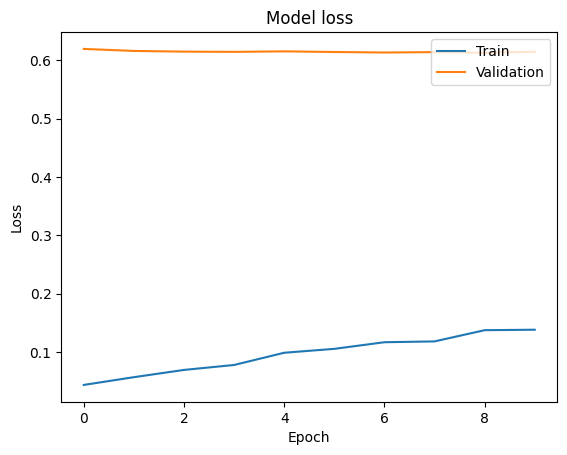

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the model
model = Sequential([

    Dense(65, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['recall'])

# Train the model
history = model.fit(X_train, y_train_binary_7,
                    validation_data=(X_val, y_val_binary_7),
                    epochs=10,
                    batch_size=64,
                    verbose=1)

# Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network - Classification Report (Test):")
print(classification_report(y_test_binary_7, y_test_pred_nn))

# Plot training

plt.plot(history.history['recall'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Fix imbance using SMOTE
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

#BorderlineSMOTE
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train_binary_7)

In [ ]:
# Updated experimental model with SMOTE data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the model
model = Sequential([

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(60, activation='relu'),

    Dense(60, activation='relu'),

    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['recall'])

# Train the model
history = model.fit(X_smoteborder, y_smoteborder,
                    validation_data=(X_val, y_val_binary_7),
                    epochs=30,
                    batch_size=128,
                    verbose=1)

# Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network - Classification Report (Test):")
print(classification_report(y_test_binary_7, y_test_pred_nn))

Epoch 1/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.6804 - recall: 0.6367 - val_loss: 0.6660 - val_recall: 0.6402
Epoch 2/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6731 - recall: 0.6377 - val_loss: 0.6793 - val_recall: 0.7651
Epoch 3/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.6709 - recall: 0.6608 - val_loss: 0.6589 - val_recall: 0.5693
Epoch 4/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.6702 - recall: 0.6377 - val_loss: 0.6677 - val_recall: 0.6305
Epoch 5/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6695 - recall: 0.6537 - val_loss: 0.6653 - val_recall: 0.6438
Epoch 6/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6684 - recall: 0.6578 - val_loss: 0.6644 - val_recall: 0.6200
Epoch 7/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6672 - recall: 0.6436 - val_loss: 0.6689 - val_recall: 0.6652
Epoch 8/30
2304/2304 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6664 - recall: 0.6358 - val_loss: 0.6551 - val

Notes:
0.67
# Updated experimental model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the model
model = Sequential([

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(60, activation='relu'),

    Dense(60, activation='relu'),

    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['recall'])

# Train the model
history = model.fit(X_smoteborder, y_smoteborder,
                    validation_data=(X_val, y_val_binary_7),
                    epochs=30,
                    batch_size=128,
                    verbose=1)

# Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network - Classification Report (Test):")
print(classification_report(y_test_binary_7, y_test_pred_nn))
0.64
0.65 recall
model = Sequential([
    Input(shape=(60,)),  # Input shape

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(60, activation='relu'),

    Dense(60, activation='relu'),

    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')
])

0.63
    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),


    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')

In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

# Train the model on the training data
svc.fit(X_train, y_train_binary_7)

# Make predictions on the test data
y_test_pred_tree = svc.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_binary_7, y_test_pred_tree))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65     73699
           1       0.42      0.59      0.49     37455

    accuracy                           0.59    111154
   macro avg       0.58      0.59      0.57    111154
weighted avg       0.63      0.59      0.60    111154



In [ ]:
for history in history_dict.items():
  print(history)

(0.0001, {'Recall': [0.03677746653556824, 0.0, 0.0, 0.0, 0.0], 'loss': [0.6589927673339844, 0.6275762319564819, 0.6230570077896118, 0.6208217740058899, 0.6194512844085693], 'val_Recall': [0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [0.6314266324043274, 0.6238405108451843, 0.6204204559326172, 0.6187028884887695, 0.6175550222396851]})
(0.001, {'Recall': [0.031838204711675644, 0.08810572326183319, 0.10165531933307648, 0.12408223003149033, 0.1413028985261917], 'loss': [0.6238075494766235, 0.6176008582115173, 0.6149405837059021, 0.6128013730049133, 0.6110991835594177], 'val_Recall': [0.1425710916519165, 0.08890669047832489, 0.17541049420833588, 0.12454945594072342, 0.11613936722278595], 'val_loss': [0.6204103827476501, 0.6171383857727051, 0.6171666383743286, 0.6171009540557861, 0.6189005970954895]})
(0.01, {'Recall': [0.008143104612827301, 0.05613402649760246, 0.0635429173707962, 0.0876384973526001, 0.09491389989852905], 'loss': [0.6243241429328918, 0.6195807456970215, 0.6179372668266296, 0.61663

In [ ]:
#SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

# Train
svm_model.fit(X_train, y_train_binary_7)

# Predict on test
y_test_pred_svm = svm_model.predict(X_test)

# Calc accuracy and recall
test_accuracy = accuracy_score(y_test_binary_7, y_test_pred_svm)
test_recall = recall_score(y_test_binary_7, y_test_pred_svm)

# Display accuracy and recall scores
print("Accuracy:", test_accuracy)
print("Recall:", test_recall)

KeyboardInterrupt: 

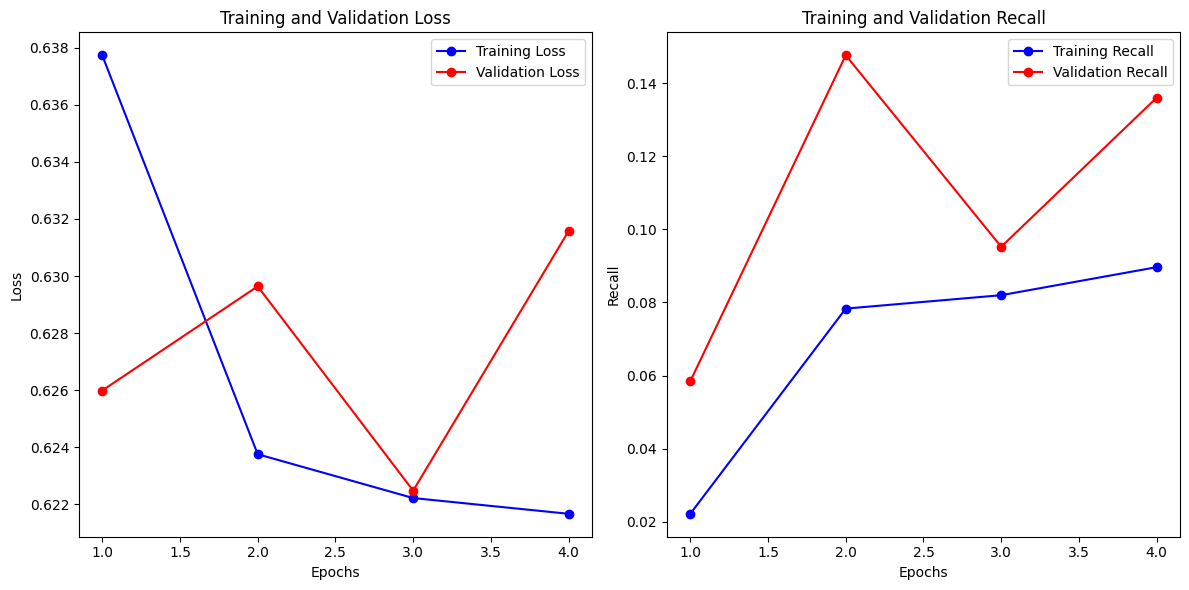

In [ ]:
import matplotlib.pyplot as plt

# Plot training history: loss and recall
def plot_training_history(history):
    # Extract loss and recall data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    epochs = range(1, len(loss) + 1)

    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot recall
    plt.subplot(1, 2, 2)
    plt.plot(epochs, recall, 'bo-', label='Training Recall')
    plt.plot(epochs, val_recall, 'ro-', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


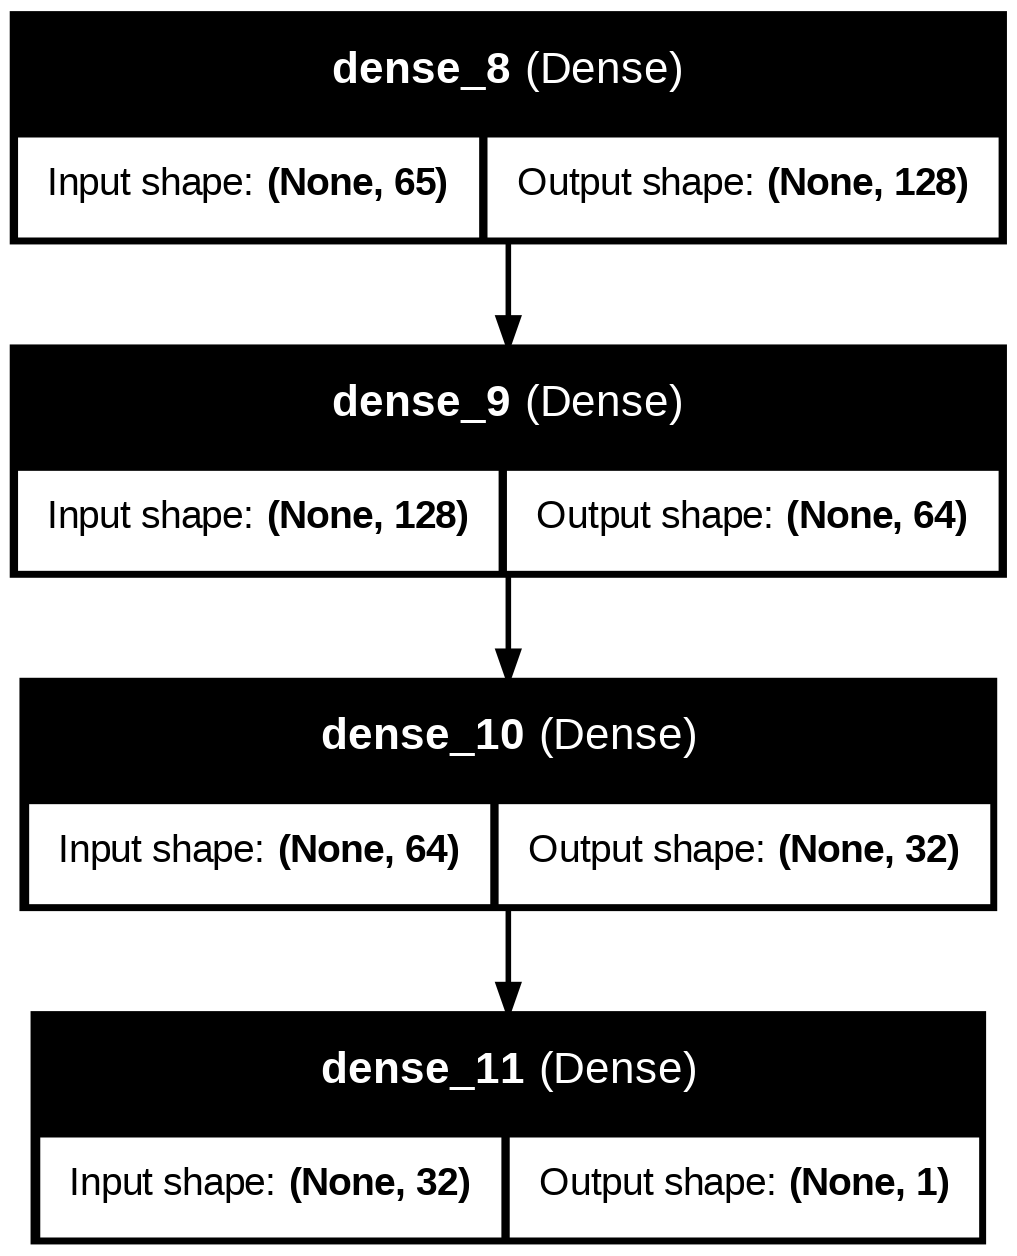

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_plot.png',  # Saves the image as a file
    show_shapes=True,          # Displays the input/output shapes
    show_layer_names=True      # Displays the layer names
)


696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy 0.6660973526900086
recall 0.0737726787620064


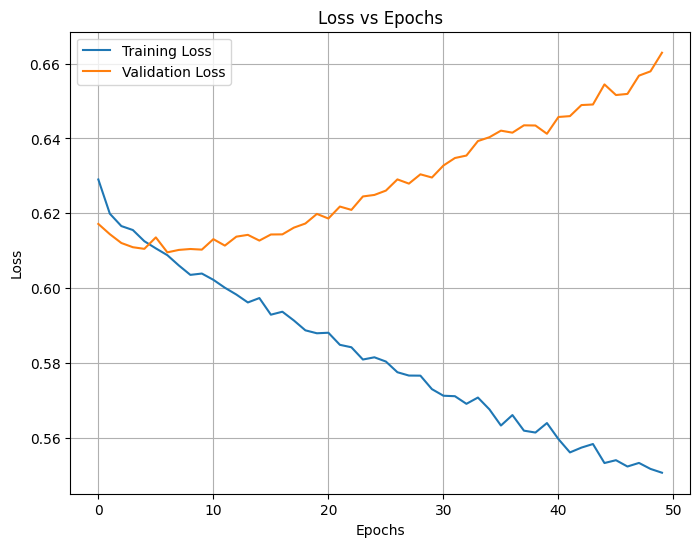

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Make predictions (probabilities)
y_pred_prob = model.predict(X_test_encoded)

# Convert probabilities to binary predictions (threshold at 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1-score
f1 = f1_score(y_test_binary, y_pred)
print(f"F1-Score: {f1:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred))


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
Accuracy: 0.6025
F1-Score: 0.3381

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.72      2639
           1       0.38      0.30      0.34      1321

    accuracy                           0.60      3960
   macro avg       0.53      0.53      0.53      3960
weighted avg       0.58      0.60      0.59      3960



In [ ]:
# Logistic Regression with L1
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logistic_model.fit(X_train_encoded, y_train_binary)

# Predictions
y_pred = logistic_model.predict(X_test_encoded)

# Evaluation
print("Logistic Regression with L1 Regularization")
print(classification_report(y_test_binary, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logistic))

Logistic Regression with L1 Regularization
              precision    recall  f1-score   support

           0       0.68      0.96      0.79      2639
           1       0.53      0.10      0.17      1321

    accuracy                           0.67      3960
   macro avg       0.61      0.53      0.48      3960
weighted avg       0.63      0.67      0.58      3960

Accuracy: 0.6704545454545454


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM
svm_model.fit(X_train_encoded, y_train_binary)

# Make predictions
y_pred_svm = svm_model.predict(X_test_encoded)

# Evaluate the SVM
print("Kernel SVM (RBF)")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Kernel SVM (RBF)
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      2639
           1       0.54      0.08      0.15      1321

    accuracy                           0.67      3960
   macro avg       0.61      0.52      0.47      3960
weighted avg       0.63      0.67      0.58      3960

Accuracy: 0.6702020202020202


from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Decision Tree")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

# Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_model.fit(X_train_encoded, y_train_binary)

# Predict probabilities
probs_gmm = gmm_model.predict_proba(X_test_encoded)

# Assign class based on higher probability
y_pred_gmm = (probs_gmm[:, 1] > 0.5).astype(int)

# Evaluation
print("Gaussian Mixture Model")
print(classification_report(y_test, y_pred_gmm))
print("Accuracy:", accuracy_score(y_test, y_pred_gmm))
print("ROC AUC:", roc_auc_score(y_test, probs_gmm[:, 1]))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=1)

# Make predictions
y_pred_svm = decision_tree.predict(X_test_encoded)

# Evaluate the SVM
print("Kernel SVM (RBF)")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.34928030303030305


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

# Final NN

    1: "Trauma and stressor",
    2: "Anxiety",
    3: "ADHD",
    4: "Conduct",
    5: "Delirium/dementia",
    6: "Bipolar",
    7: "Depressive",
    8: "Oppositional defiant",
    9: "Pervasive developmental",
    10: "Personality",
    11: "Schizophrenia/psychotic",
    13: "Other disorders",

## Pre-process data

In [33]:
# Double check input features shape
print(features.shape)
print(targets_condition1.shape)

(370515, 7)
(370515,)


In [34]:
# Create feature and target set for each disorder

# Create the target variable y_train_7
y_train_7 = targets_condition1.apply(lambda x: 1 if x == 7 else 0)

# Concatenate features with a disorder indicator
x_train_7 = features.copy()
x_train_7["DEPRESSIVE"] = 1


# Create the target variable y_train_6
y_train_6 = targets_condition1.apply(lambda x: 1 if x == 6 else 0)

# Concatenate features with a disorder indicator
x_train_6 = features.copy()
x_train_6['BIPOLAR']= 1


# Create the target variable y_train_11
y_train_11 = targets_condition1.apply(lambda x: 1 if x == 11 else 0)

# Concatenate features with a disorder indicator
x_train_11 = features.copy()
x_train_11["SHIZ"] = 1


# Create the target variable y_train_2
y_train_2 = targets_condition1.apply(lambda x: 1 if x == 2 else 0)

# Concatenate features with a disorder indicator
x_train_2 = features.copy()
x_train_2 ['ANXIETY'] = 1


# Create the target variable y_train_1
y_train_1 = targets_condition1.apply(lambda x: 1 if x == 1 else 0)

# Concatenate features with a disorder indicator
x_train_1 = features.copy()
x_train_1['TRAUMA'] = 1

print(x_train_7.shape)
print(y_train_7.shape)

print(x_train_6.shape)
print(y_train_6.shape)

print(x_train_11.shape)
print(y_train_11.shape)

print(x_train_2.shape)
print(y_train_2.shape)

print(x_train_1.shape)
print(y_train_1.shape)


(370515, 8)
(370515,)
(370515, 8)
(370515,)
(370515, 8)
(370515,)
(370515, 8)
(370515,)
(370515, 8)
(370515,)


In [35]:
# Combine X and Y datasets
X_train_combined = pd.concat([x_train_7, x_train_6, x_train_11, x_train_2, x_train_1], axis=0, ignore_index=True)
y_train_combined = pd.concat([y_train_7, y_train_6, y_train_11, y_train_2, y_train_1], axis=0, ignore_index=True)

In [36]:
# Check shapes
print(X_train_combined.shape)
print(y_train_combined.shape)

(1852575, 12)
(1852575,)


In [37]:
# Replace NaN values with 0
X_train_combined = X_train_combined.fillna(int(0), inplace=False)
X_train_combined = X_train_combined.astype(int)

In [38]:
# View data to make sure everything looks good
X_train_combined.head()

,AGE,EDUC,RACE,GENDER,STATEFIP,MARSTAT,EMPLOY,DEPRESSIVE,BIPOLAR,SHIZ,ANXIETY,TRAUMA
0,12,4,5,2,38,2,5,1,0,0,0,0
1,9,5,5,2,1,1,5,1,0,0,0,0
2,5,4,6,2,1,1,1,1,0,0,0,0
3,9,5,5,1,1,4,4,1,0,0,0,0
4,6,5,5,2,8,1,4,1,0,0,0,0


In [39]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform features - convert to OHE
X_train_combined_ohe = encoder.fit_transform(X_train_combined)

In [41]:
# Research Set - comment out for final tune

#subset_amount = 25000
#X_train_combined_ohe = X_train_combined_ohe[:subset_amount]
#y_train_combined = y_train_combined[:subset_amount]


In [42]:
# Create development, test, and validation sets

# Split ratio for test set
#dev,test,val = 60/30/10
test_ratio = 0.4

# Split into training and test sets for a single target
X_train, X_test, y_train, y_test = train_test_split(
    X_train_combined_ohe,
    y_train_combined,
    test_size=test_ratio,
    random_state=1,
    stratify=y_train_combined,
    shuffle=True
)

# Further split the test set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    test_size=.25,
    random_state=1,
    stratify=y_test
)

# Print the shapes of the final sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1111545, 75)
y_train shape: (1111545,)
X_test shape: (555772, 75)
y_test shape: (555772,)
X_val shape: (185258, 75)
y_val shape: (185258,)


In [43]:
# Upsample all targets equally to match using SMOTE - this wil take ~15mins
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

#BorderlineSMOTE
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train)

In [44]:
# Save Smote training data to pickle
'''
import pickle

# Save the data to a pickle file
with open('X_smoteborder.pkl', 'wb') as f:
    pickle.dump(X_smoteborder, f)

with open('y_smoteborder.pkl', 'wb') as f:
    pickle.dump(y_smoteborder, f)
'''

## Load data for training

In [ ]:
# Reload Smote training from pickle
'''
import pickle

# Load the data from the pickle file
with open('X_smoteborder.pkl', 'rb') as f:
    X_smoteborder = pickle.load(f)

with open('y_smoteborder.pkl', 'rb') as f:
    y_smoteborder = pickle.load(f)
'''

In [47]:
# Get Final Shape of Training Data
print(X_smoteborder.shape)
print(y_smoteborder.shape)


#Should be (1816418, 75), (1816418,)

(1816418, 75)
(1816418,)


## Build Model

In [48]:
# Integrate Weights and Bias
!pip install wandb

!wandb login
#2184af33313777a95ce10dc38c2e90fd3a202bdd

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [52]:
# Install libraries
#!pip install keras-tuner
#import keras_tuner
#from keras_tuner import GridSearch
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras_tuner import RandomSearch
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random

# Import Weights and Balances
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbCallback

In [54]:
# Get shape of training data
print(X_smoteborder.shape)

(1816418, 75)


In [ ]:
# Test various learning rates

lr = [0.007,0.008,0.009,0.011,0.012]
for rate in lr:

  # Create the model
  model = Sequential([

      Dense(120, activation='relu'),
      Dropout(0.2),

      Dense(120, activation='relu'),
      Dropout(0.2),

      Dense(120, activation='relu'),
      Dropout(0.2),

      Dense(60, activation='relu'),

      Dense(60, activation='relu'),

      Dense(30, activation='relu'),

      Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=rate),
                loss='binary_crossentropy',
                metrics=['recall'])

  # Train the model
  history = model.fit(X_smoteborder, y_smoteborder,
                      validation_data=(X_val, y_val),
                      epochs=20,
                      batch_size=128,
                      verbose=1)

  # Evaluate the model
  y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
  print("\nNeural Network - Classification Report (Test):")
  print(f'LR: {rate}')
  print(classification_report(y_test, y_test_pred_nn))


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6875 - recall: 0.6159 - val_loss: 0.6685 - val_recall: 0.7044
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6747 - recall: 0.6784 - val_loss: 0.6576 - val_recall: 0.5831
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6692 - recall: 0.6947 - val_loss: 0.6576 - val_recall: 0.4700
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6687 - recall: 0.6407 - val_loss: 0.6679 - val_recall: 0.6478
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6675 - recall: 0.6770 - val_loss: 0.6773 - val_recall: 0.6871
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6637 - recall: 0.6947 - val_loss: 0.7049 - val_recall: 0.7933
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6596 - recall: 0.7276 - val_loss: 0.6703 - val_recall: 0.6420
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6584 - recall: 0.6903 - val_loss: 0.6890 - val_recall: 0.6940
Epoch 9

In [ ]:
# Tuning architecture
# Create the model
model = Sequential([

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(120, activation='relu'),
    Dropout(0.2),

    Dense(60, activation='relu'),

    Dense(60, activation='relu'),

    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.012),
              loss='binary_crossentropy',
              metrics=['recall'])

# Train the model
history = model.fit(X_smoteborder, y_smoteborder,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=128,
                    verbose=1)

# Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network - Classification Report (Test):")
print(f'LR: {rate}')
print(classification_report(y_test, y_test_pred_nn))


epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,▁▆███████████████████████
epoch/recall,█▄▂▂▁▁▂▁▁▁▁▁▂▁▁▁▁▂▁▁▁▁▂▁▁
epoch/val_loss,▁▇▆▇▇█▆▇▇▇▆▆▆▆▆▆▇▆▇▇▇█▆▆▇
epoch/val_recall,▆█▁███▁███▁▁▁▁▁▁█▁▁███▁▁█
epoch/epoch,24
epoch/learning_rate,0.012
epoch/loss,0.69325
epoch/recall,0.50347
epoch/val_loss,0.69688


Epoch 1/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.6052 - recall: 0.7277 - val_loss: 0.5768 - val_recall: 0.7156
Epoch 2/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5874 - recall: 0.7576 - val_loss: 0.6084 - val_recall: 0.7682
Epoch 3/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5850 - recall: 0.7580 - val_loss: 0.5803 - val_recall: 0.7123
Epoch 4/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5836 - recall: 0.7638 - val_loss: 0.6017 - val_recall: 0.7530
Epoch 5/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5827 - recall: 0.7631 - val_loss: 0.6060 - val_recall: 0.7586
Epoch 6/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5818 - recall: 0.7633 - val_loss: 0.5973 - val_recall: 0.7387
Epoch 7/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5813 - recall: 0.7658 - val_loss: 0.6107 - val_recall: 0.7717
Epoch 8/25
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5798 - recall: 0.7646 - val_loss: 0.5931 - val

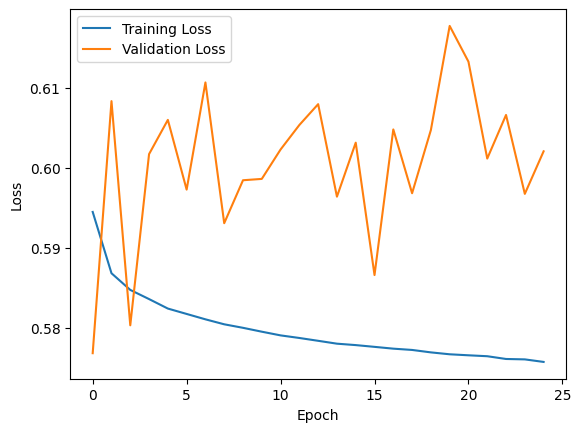

In [57]:
#Build Final NN Model

#https://wandb.ai/wandb_fc/articles/reports/Running-Hyperparameter-Sweeps-to-Pick-the-Best-Model--Vmlldzo1NDQ0OTIy

# Initilize a new wandb run
wandb.init(project="EDS-NN_mgcld")

#########################################
# Hyperparam config

config = wandb.config
config.learning_rate = 0.001
config.batch_size = 256
config.epochs = 25
config.Dropout = 0.3
config.activation = 'relu'
config.optimizer = 'Adam'

#########################################

# Input (1816418, 75)

# Create the model
model = Sequential([

    Dense(160, activation='relu'),
    Dropout(config.Dropout),

    Dense(120, activation='relu'),
    Dropout(config.Dropout),

    Dense(120, activation='relu'),
    Dropout(config.Dropout),

    Dense(60, activation='relu'),

    Dense(60, activation='relu'),

    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=config.learning_rate),
              loss='binary_crossentropy',
              metrics=['recall'])

# Train the model
history = model.fit(X_smoteborder, y_smoteborder,
                    validation_data=(X_val, y_val),
                    epochs=config.epochs,
                    batch_size=config.batch_size,
                    callbacks=[WandbMetricsLogger()],
                    verbose=1)

# Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_nn))


# Save model
# "model.h5" is saved in wandb.run.dir & will be uploaded at the end of training
model.save(os.path.join(wandb.run.dir, "model.keras"))

# Save a model file manually from the current directory:
wandb.save('model.keras')

# Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

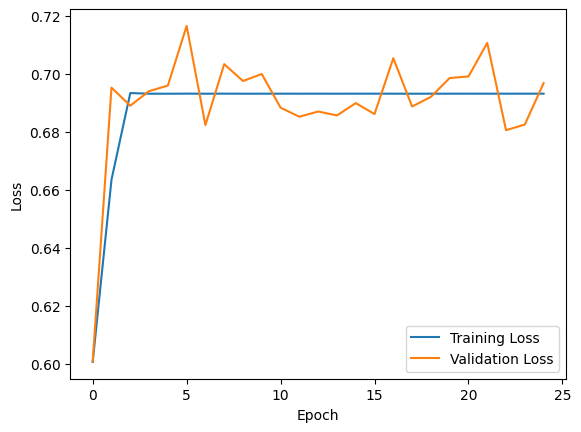

In [56]:
# Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save model
# Save the trained model to the W&B run directory
model.save(os.path.join(wandb.run.dir, "model.keras"))

# Optionally save the model manually
wandb.save('model.keras')

# Save logs or checkpoints
wandb.save('../logs/*')
wandb.save(os.path.join(wandb.run.dir, "checkpoint*"))

ValueError: Glob may not walk above the base path

In [ ]:
model.summary()

In [ ]:
targets.tail(25)

y_train_binary_7 = y_train.apply(lambda x: 1 if x == 7 else 0)
y_test_binary_7 = y_test.apply(lambda x: 1 if x == 7 else 0)
y_val_binary_7 = y_val.apply(lambda x: 1 if x == 7 else 0)

y_train_binary_6 = y_train.apply(lambda x: 1 if x == 6 else 0)
y_test_binary_6 = y_test.apply(lambda x: 1 if x == 6 else 0)
y_val_binary_6 = y_val.apply(lambda x: 1 if x == 6 else 0)

y_train_binary_11 = y_train.apply(lambda x: 1 if x == 11 else 0)
y_test_binary_11 = y_test.apply(lambda x: 1 if x == 11 else 0)
y_val_binary_11 = y_val.apply(lambda x: 1 if x == 11 else 0)

y_train_binary_2 = y_train.apply(lambda x: 1 if x == 2 else 0)
y_test_binary_2 = y_test.apply(lambda x: 1 if x == 2 else 0)
y_val_binary_2 = y_val.apply(lambda x: 1 if x == 2 else 0)

y_train_binary_1 = y_train.apply(lambda x: 1 if x == 1 else 0)
y_test_binary_1 = y_test.apply(lambda x: 1 if x == 1 else 0)
y_val_binary_1 = y_val.apply(lambda x: 1 if x == 1 else 0)

,MH1
376819,13
376820,13
376821,13
376822,13
376823,13
376824,13
376825,13
376826,13
376827,13
376828,13


In [ ]:
# Full Size Set - 5 in 1 model





# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform feature
features_encoded = encoder.fit_transform(features)

# Targets for condition1
targets = targets_condition1

# Check size of encoded set
features_encoded.shape